In [23]:
# Jairo Andres Saavedra Alfonso
# 01 de Febrero de 2019
# Universidad de Los Andes
# Phycis 
######################__________________Report 01__________________######################

In [24]:
#Packages
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from astropy.table import Table

In [25]:
# Reading data from truth_DR12Q.fits. This file have the database sample of spectra with human-expert classifitacion

hdul = fits.open('truth_DR12Q.fits') # Open file
info=hdul.info() # File info
columns=hdul[1].columns # File Columns 
print(info,'/n',columns)
data=hdul[1].data # Database of spectra with human-expert classifications 
print(data['THING_ID'])


Filename: truth_DR12Q.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     27   546856R x 9C   [J, D, J, J, J, J, J, D, D]   
None /n ColDefs(
    name = 'THING_ID'; format = 'J'
    name = 'Z_VI'; format = 'D'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'CLASS_PERSON'; format = 'J'
    name = 'Z_CONF_PERSON'; format = 'J'
    name = 'BAL_FLAG_VI'; format = 'D'
    name = 'BI_CIV'; format = 'D'
)
[357405338 353907506  33180814 ... 352121795 401440280 401440241]


In [26]:
# The column 'CLASS_PERSON' have a class identifier for each spectrum: STARS=1, GALAXY=4, QSO=3 and QSO_BAL=30.
C_P=data['CLASS_PERSON'] #Class Person column 
STAR=C_P[C_P==1] # objects classified as stars
GALAXY=C_P[C_P==4] # objects classified as galaxies 
QSO=C_P[C_P==3] # objects classified as QSO (Quasars)
QSO_BAL=C_P[C_P==30] # objects classified as QSO BAL (Quasars with Broad Absortions Lines)
N_C=C_P[C_P!=30]   
N_C=N_C[N_C!=3]
N_C=N_C[N_C!=1]
N_C=N_C[N_C!=4] # objects wrong classified
print(STAR.shape)
print(GALAXY.shape)
print(QSO.shape)
print(QSO_BAL.shape)
print(N_C.shape)

(207915,)
(22795,)
(270686,)
(29659,)
(15801,)


In [27]:
Z_VI=data['Z_VI'] # Redshift of each object
print(Z_VI[Z_VI==0.0].shape)
Z_C_P=data['Z_CONF_PERSON']
print(Z_C_P[Z_C_P==0].shape)
T_ID=data['THING_ID']
i=T_ID==-1
T_ID=T_ID[i]

(214791,)
(7123,)


Text(0.5, 1.0, 'QSO')

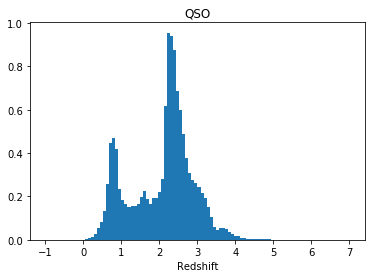

In [28]:
ii=C_P==3
oo=C_P==30
Z_VI_QSO=Z_VI[ii]
Z_VI_QSO_BAL=Z_VI[oo]
plt.hist(Z_VI_QSO,100,density=True)
plt.xlabel('Redshift')
plt.title('QSO')


Text(0.5, 1.0, 'QSO_BAL')

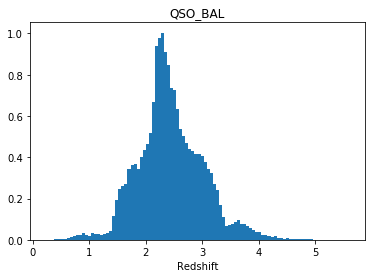

In [29]:
plt.hist(Z_VI_QSO_BAL,100,density=True)
plt.xlabel('Redshift')
plt.title('QSO_BAL')

Filename: data_dr12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (886, 639464)   float64   
  1                1 BinTableHDU     16   639464R x 4C   [J, J, J, J]   
[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb7fa091898>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fb7f5111898>] /n ColDefs(
    name = 'TARGETID'; format = 'J'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
)
[ 87897905  96906927  96907939 ... 505037917 506611870 510289698]
[357405338 353907506  33180814 ... 352121795 401440280 401440241]
(536684,)


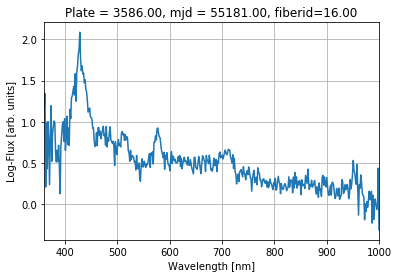

In [30]:
# Reading data from data_dr12.fits. This file had the spectra from data dr12. 
hdul_2 = fits.open('data_dr12.fits') # Open file
info=hdul_2.info() # File info 
columns=hdul_2[1].columns # File Columns 
print(hdul,'/n',columns)
data2=hdul_2[1].data # Database of spectra
spectra=hdul_2[0].data # Spectrum of each object 


# The Spectra in this database have three main parameters: Plate ID, The modified julian day and fiber ID of the observation.
# Let's take a look of the first spectrum.
x=np.linspace(360,1000,443) # I cut the sample to 443 pixels in spaced log-wavelength.  
#x=np.linspace(0,886,886)
zero_spectrum=spectra[12030] #First spectrum
zero_spectrum=zero_spectrum[:443]

PLATE=data2['PLATE'] # Spectra's Plate ID
MJD=data2['MJD'] # Spectra's the modified juliam day
FIBERID=data2['FIBERID'] # Spectra's fiber ID

zero_plate=PLATE[0] # zero spectrum Plate ID
zero_mjd=MJD[0] # zero spectrum MJD
zero_fiberid=FIBERID[0] # zero spectrum Fiber ID
param = 'Plate = {:.2f}, mjd = {:.2f}, fiberid={:.2f}'.format(zero_plate, zero_mjd, zero_fiberid)
plt.plot(x,np.log(zero_spectrum))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Log-Flux [arb. units]')
plt.title(param)
plt.xlim([360,1000])
plt.savefig('spectrum.png')
plt.grid()

# I noticed that each object and spectrum don't have the same label. So it's imposible to make some ID correlations.  
print(data2['TARGETID'])
print(data['THING_ID'])
da=np.intersect1d(data2['TARGETID'],data['THING_ID'])
print(da.shape)

# So, in orden to make a correlation betwen identified object and spectrum we need to use all three parameters (Plate ID, MJD, FiberID)

In [31]:
print(data2.shape)

(639464,)


In [32]:
######################__________________Report 02__________________######################

## This week I pretend to find some correaltions betwen objects with human-expert classification and spretum from DR12

# Subset of PLATE parameters of both data
data_PLATE_1=data['PLATE']
data_PLATE_2=data2['PLATE']

# Subset of MJD parameters of both data
data_MJD_1=data['MJD']
data_MJD_2=data2['MJD']

# Subset of FIBERID parameters of both data
data_FIBERID_1=data['FIBERID']
data_FIBERID_2=data2['FIBERID']

# Subset of FIBERID parameters of both data
data_ID_1=data['THING_ID']
data_ID_2=data2['TARGETID']

# I make here an intersecting set for all three parameters (PLATE, MJD, FIBERID) in both data.
data_PLATE_CO=np.intersect1d(data_PLATE_1,data_PLATE_2)
data_MJD_CO=np.intersect1d(data_MJD_1,data_MJD_2)
data_FIBERID_CO=np.intersect1d(data_FIBERID_1,data_FIBERID_2)
data_ID_CO=np.intersect1d(data_ID_1,data_ID_2)

# As we can see, in both database, there is a correlation betwen the number of Plates, the modified julian day and the Fiber ID. 
print('Number of Plates use in both datasets:',data_PLATE_CO.shape)
print('Number of MJD use in both datasets:',data_MJD_CO.shape)
print('Number of FIBERID use in both datasets:',data_FIBERID_CO.shape)
print('Number of FIBERID use in both datasets:',data_ID_CO.shape)
#print(data_PLATE_1.dtype)

Number of Plates use in both datasets: (2401,)
Number of MJD use in both datasets: (681,)
Number of FIBERID use in both datasets: (1000,)
Number of FIBERID use in both datasets: (536684,)


In [33]:
# I create two DataFrame for Superset_DR12Q and data_dr12 with only three parameters
data={'PLATE':data_PLATE_1,'MJD':data_MJD_1,'FIBERID':data_FIBERID_1,'ID':data_ID_1}
data=pd.DataFrame(data=data)

data2={'PLATE':data_PLATE_2,'MJD':data_MJD_2,'FIBERID':data_FIBERID_2,'ID':data_ID_2}
data2=pd.DataFrame(data=data2)

In [34]:
# I convert all objects in both set to string chain in orden to combine them as one new ID.
data['PLATE']=data['PLATE'].astype(str)
data['MJD']=data['MJD'].astype(str)
data['FIBERID']=data['FIBERID'].astype(str)
#data['ID']=data['ID'].astype(str)


data['PM'] = data['MJD'].str.cat(data['FIBERID'],sep="-")
#data['M'] = data['FIBERID'].str.cat(data['ID'],sep="-")

data['NEWID'] = data['PLATE'].str.cat(data['PM'],sep="-")
data_1=data.drop(columns=['PLATE','MJD','FIBERID','ID','PM']).values # New set of database 2 with new ID's
print(data_1.dtype)

data2['PLATE']=data2['PLATE'].astype(str)
data2['MJD']=data2['MJD'].astype(str)
data2['FIBERID']=data2['FIBERID'].astype(str)
#data2['ID']=data2['ID'].astype(str)


data2['PM'] = data2['MJD'].str.cat(data2['FIBERID'],sep="-")
#data2['M'] = data2['FIBERID'].str.cat(data2['ID'],sep="-")

data2['NEWID'] = data2['PLATE'].str.cat(data2['PM'],sep="-")
data_2=data2.drop(columns=['PLATE','MJD','FIBERID','ID','PM']).values # New set of database 2 with new ID's
print(data_2.shape)
p=data_2=='4869-55896-132'
ll=data_2[p]
print(ll)

object
(639464, 1)
['4869-55896-132']


In [35]:
# With the routine of numpy intersect1d, I find the intersections elements in both sets. This elements  
data_CO=np.array(np.intersect1d(data_1,data_2,return_indices=True))

data_CO_objects=data_CO[0] # The unique new ID of each element in both sets
data_CO_ind1=data_CO[1] # Indices of intersected elements from the original data 1 (Superset_DR12Q.fits) 
data_CO_ind2=data_CO[2] # Indices of intersected elements form the original data 2 (data_dr12.fits)
print('I find',len(data_CO_objects),'objects with spectra from DR12')
print(data_CO_ind1,data_CO_ind2)
indi={'ind1':data_CO_ind1,'ind2':data_CO_ind2}
ind=pd.DataFrame(data=indi,index=data_CO_ind1)
#from astropy.table import Table
#t = fits.getdata('data_dr12.fits')
#print(t.shape)

spec= pd.DataFrame(spectra)

#spec=spec.loc[data_CO_ind2]

print(ind)

I find 537677 objects with spectra from DR12
[17792 17931 17610 ... 457655 459274 457504] [25 26 29 ... 639461 639462 639463]
          ind1    ind2
17792    17792      25
17931    17931      26
17610    17610      29
17437    17437      30
17177    17177      33
17120    17120      36
18775    18775       0
17104    17104      40
17103    17103      41
16924    16924      42
16794    16794      44
16986    16986      45
17015    17015      47
16756    16756      48
16508    16508      50
16439    16439      51
16431    16431      52
16489    16489      54
16542    16542      55
16238    16238      56
16253    16253      57
16007    16007      58
15862    15862      59
15784    15784      60
15653    15653      61
15949    15949      62
18629    18629       3
15600    15600      63
15595    15595      64
15496    15496      65
...        ...     ...
155341  155341  639423
155645  155645  639425
155991  155991  639426
155421  155421  639427
154291  154291  638673
155124  155124  639429


In [36]:
# Now that I know which object have a spectrum. I can make a unique database of objects
hdul = fits.open('truth_DR12Q.fits')
#hdul2 = fits.open('data_dr12.fits')
data=hdul[1].data
info=hdul[1].columns

#ti=np.array(data['THING_ID'],dtype=float)
#pl=np.array(data['PLATE'],dtype=float)
#mjd=np.array(data['MJD'],dtype=float)
#fid=np.array(data['FIBERID'],dtype=float)
cp=np.array(data['CLASS_PERSON'],dtype=float)
z=np.array(data['Z_VI'],dtype=float)
zc=np.array(data['Z_CONF_PERSON'],dtype=float)
bal=np.array(data['BAL_FLAG_VI'],dtype=float)
bi=np.array(data['BI_CIV'],dtype=float)

d={'CLASS_PERSON':cp,'Z_VI':z,'Z_CONF_PERSON':zc,'BAL_FLAG_VI':bal,'BI_CIV':bi}
data_0=pd.DataFrame(data=d)#.values #super database
obj=data_0.loc[data_CO_ind1]

print(obj.shape)



(537677, 5)


In [37]:
######################__________________Report 03__________________######################


# Balance of classes 
C_P=obj['CLASS_PERSON'] #Class Person column 
STAR=C_P[C_P==1] # objects classified as stars
GALAXY=C_P[C_P==4] # objects classified as galaxies 
QSO=C_P[C_P==3] # objects classified as QSO (Quasars)
QSO_BAL=C_P[C_P==30] # objects classified as QSO BAL (Quasars with Broad Absortions Lines)
N_C=C_P[C_P!=30]   
N_C=N_C[N_C!=3]
N_C=N_C[N_C!=1]
N_C=N_C[N_C!=4] # objects wrong classified
print('Stars:',STAR.shape)
print('Galaxies:',GALAXY.shape)
print('QSO:',QSO.shape)
print('QSO BAL:',QSO_BAL.shape)
print('No class:',N_C.shape)

Stars: (207905,)
Galaxies: (20699,)
QSO: (270534,)
QSO BAL: (29652,)
No class: (8887,)


In [38]:
# Preprocessing. I remove non-classified objects also objects with negative redshift.  
stars=obj.loc[obj['CLASS_PERSON']==1]
galaxies=obj.loc[obj['CLASS_PERSON']==4]
qsos=obj.loc[obj['CLASS_PERSON']==3]
qsos_bal=obj.loc[obj['CLASS_PERSON']==30]

frames=[stars,galaxies,qsos,qsos_bal]
new_obj=pd.concat(frames)#, keys=['stars', 'galaxies', 'qso','qso_bal'])

#new_obj=new_obj.loc[new_obj['Z_VI']!=0]
obj=new_obj.loc[new_obj['Z_CONF_PERSON']!=0]
#indio=np.array(obj.index)
#for i in range(len(indio)):
#    print(indio[i])
print(obj.shape)

(528790, 5)


In [39]:
# Sample of objects. I chosen 250 object per class. 
stars=obj.loc[obj['CLASS_PERSON']==1]
galaxies=obj.loc[obj['CLASS_PERSON']==4]
qsos=obj.loc[obj['CLASS_PERSON']==3]
qsos_bal=obj.loc[obj['CLASS_PERSON']==30]

#print(stars)
sample_star=stars.sample(n=500,weights='CLASS_PERSON', random_state=5)
sample_galaxy=galaxies.sample(n=500,weights='CLASS_PERSON', random_state=5)
sample_qso=qsos.sample(n=500,weights='CLASS_PERSON', random_state=5)
sample_qso_bal=qsos_bal.sample(n=500,weights='CLASS_PERSON', random_state=5)

sample_objects=pd.concat([sample_star,sample_galaxy,sample_qso,sample_qso_bal])

ind_star=np.array(sample_star.index)
ind_galaxy=np.array(sample_galaxy.index)
ind_qso=np.array(sample_qso.index)
ind_qso_bal=np.array(sample_qso_bal.index)

indi=np.concatenate((ind_galaxy, ind_galaxy,ind_qso,ind_qso_bal), axis=None)
indi1=ind.loc[indi].values
#print(indi)

spectra_2000=np.zeros((2000,443))
j=0
for i in indi:
    k=indi1[j,1]
    spectra_2000[j,:]=np.log(abs(spectra[k,:443]))
    j=j+1    
spectra_2000=pd.DataFrame(spectra_2000)
X=spectra_2000.replace(-np.inf,0)


X=X.values

y=sample_objects['CLASS_PERSON']
y=y.replace([1, 4, 3, 30], [0,1,2,3]).values
y=np.array(y,dtype=float)
#y=y.values.reshape(-1,1)
#sample_objects.loc[sample_objects['CLASS_PERSON'] == 1] = "Star"
print(y) 

[0. 0. 0. ... 3. 3. 3.]


/home/steingate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


In [40]:
######################__________________Report 05__________________######################

# my first Neural Network. SpectraNET :}

import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.autograd import Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train = Variable(torch.tensor(X_train, dtype=torch.float))
X_test = Variable(torch.tensor(X_test, dtype=torch.float))
y_train = Variable((torch.tensor(y_train, dtype=torch.long)))
y_test = Variable((torch.tensor(y_train, dtype=torch.long)))

# Scaling 
X_train_max, _ = torch.max(X_train, 0)
X_test_max, _ = torch.max(X_test, 0)

X_train = torch.div(X_train, X_train_max)
X_test = torch.div(X_test, X_test_max)

#y_train= torch.div(y_train, 100)
#y_test=y_test/100
y_test1=torch.tensor(X_test[0,:].reshape(1,-1),dtype=torch.float)
print(y_train)

tensor([0, 1, 1, 1, 1, 1, 3, 2, 3, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1,
        2, 2, 3, 1, 2, 3, 3, 1, 2, 0, 1, 3, 0, 1, 3, 1, 2, 2, 0, 2, 2, 2, 0, 0,
        0, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3, 2, 2, 2, 2, 3, 1, 0, 0, 0, 2,
        1, 3, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 3, 0, 0, 2, 0, 0, 3, 2, 1, 3, 3, 3,
        1, 0, 1, 3, 1, 3, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 3, 0, 0, 0,
        0, 0, 1, 0, 3, 3, 0, 0, 1, 1, 0, 0, 3, 3, 1, 3, 1, 0, 0, 0, 3, 1, 2, 0,
        3, 1, 2, 0, 0, 0, 3, 2, 1, 3, 3, 3, 1, 1, 0, 0, 3, 0, 2, 0, 3, 1, 0, 2,
        3, 0, 0, 2, 3, 0, 1, 3, 3, 0, 2, 2, 2, 2, 0, 2, 1, 3, 2, 1, 3, 2, 3, 2,
        0, 3, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 3, 2, 3, 2, 0, 0, 1,
        0, 1, 0, 1, 1, 3, 2, 0, 2, 3, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 2,
        0, 1, 3, 0, 1, 1, 1, 2, 1, 3, 2, 3, 2, 3, 2, 3, 3, 2, 1, 0, 2, 1, 2, 1,
        3, 0, 0, 2, 1, 3, 1, 2, 1, 3, 0, 0, 2, 1, 1, 3, 0, 2, 2, 3, 1, 0, 2, 0,
        1, 0, 3, 2, 1, 2, 3, 2, 2, 3, 3,

/home/steingate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/home/steingate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
# Implementation
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support

batch_size=200
learning_rate=0.01
epochs=100
log_interval=10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(443, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #print(x.shape)
        return F.log_softmax(x)
    
net = Net()
print(net)

# create a stochastic gradient descent optimizer
opt = optim.Adam(params=net.parameters(), lr=learning_rate)
# create a loss function
criterion = nn.CrossEntropyLoss()
LOSS=[]
p=[]
r=[]
f=[]
p1=[]
r1=[]
f1=[]
p2=[]
r2=[]
f2=[]
p3=[]
r3=[]
f3=[]
for i in range(epochs):

    opt.zero_grad()
    data=X_train
    net_out = net(data)
    #print('loss', loss.detach().item())       
    #print(net_out.shape,y_train)
    loss = criterion(net_out, y_train)
    LOSS.append(loss.detach().item())
    loss.backward()
    opt.step()
    net_o=net(X_test)
    pred = net_o.data.max(1)[1]
    pres,recall,f,_=precision_recall_fscore_support(y_test, pred, average=None)
    print(pres,recall,f)
    
    p.append(pres[0])
    r.append(recall[0])
    f.append(f[0])
    
    p1.append(pres[1])
    r1.append(recall[1])
    f1.append(f[1])
    
    p2.append(pres[2])
    r2.append(recall[2])
    f2.append(pres[2])
    
    p3.append(pres[3])
    r3.append(pres[3])
    f3.append(pres[3])
    
    
    plt.subplot(131)
    plt.plot(i,pres[0],label='Stars',c='r')
    plt.plot(i,pres[1],label='Galaxies',c='g')
    plt.plot(i,pres[2],label='QSO',c='b')
    plt.plot(i,pres[3],label='QSO_BAL',c='silver')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    
    plt.subplot(132)    
    plt.scatter(i,recall[0],label='Stars',c='r')
    plt.scatter(i,recall[1],label='Galaxies',c='g')
    plt.scatter(i,recall[2],label='QSO',c='b')
    plt.scatter(i,recall[3],label='QSO_BAL',c='silver')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()  
    
    plt.subplot(133)    
    plt.scatter(i,f[0],label='Stars',c='r')
    plt.scatter(i,f[1],label='Galaxies',c='g')
    plt.scatter(i,f[2],label='QSO',c='b')
    plt.scatter(i,f[3],label='QSO_BAL',c='silver')
    plt.xlabel('Epoch')
    plt.ylabel('F1')
    plt.legend()
    plt.savefig('prf.png')
    
    
plt.close()

plt.plot(range(epochs),np.array(LOSS),label='Train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.legend()
plt.title('NN Learning')
plt.savefig('loss.png')
    
    
test_loss=0    
#y_pred=net(X_test)
net_o=net(X_test)
#test_loss += criterion(net_out, y_test).detach().
pred = net_o.data.max(1)[1]  # get the index of the max log-probability
print(pred)

Net(
  (fc1): Linear(in_features=443, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
)
[0.16 0.   0.26 0.25] [0.04 0.   0.48 0.47] [0.07 0.   0.34 0.32]


/home/steingate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[0.18 0.   0.26 0.25] [0.05 0.   0.53 0.4 ] [0.08 0.   0.35 0.31]
[0.16 0.25 0.26 0.23] [0.08 0.07 0.65 0.14] [0.11 0.11 0.37 0.18]
[0.18 0.25 0.25 0.21] [0.12 0.07 0.59 0.12] [0.14 0.11 0.35 0.15]
[0.19 0.26 0.24 0.24] [0.16 0.07 0.43 0.26] [0.17 0.11 0.31 0.25]
[0.19 0.21 0.24 0.25] [0.22 0.04 0.39 0.26] [0.21 0.07 0.3  0.25]
[0.2  0.18 0.25 0.26] [0.28 0.03 0.41 0.19] [0.23 0.05 0.31 0.22]
[0.22 0.24 0.25 0.29] [0.38 0.03 0.48 0.07] [0.28 0.05 0.33 0.11]
[0.23 0.26 0.26 0.3 ] [0.4  0.06 0.46 0.06] [0.29 0.1  0.33 0.1 ]
[0.21 0.23 0.26 0.28] [0.32 0.13 0.38 0.14] [0.26 0.17 0.31 0.18]
[0.21 0.25 0.26 0.29] [0.22 0.27 0.31 0.2 ] [0.22 0.26 0.29 0.24]
[0.21 0.26 0.27 0.3 ] [0.17 0.33 0.33 0.19] [0.19 0.29 0.29 0.24]
[0.19 0.24 0.26 0.28] [0.17 0.29 0.34 0.18] [0.18 0.26 0.3  0.22]
[0.23 0.27 0.26 0.27] [0.31 0.19 0.35 0.18] [0.26 0.22 0.3  0.22]
[0.24 0.27 0.26 0.27] [0.44 0.05 0.34 0.19] [0.31 0.08 0.3  0.22]
[0.24 0.28 0.27 0.27] [0.41 0.07 0.37 0.17] [0.3  0.11 0.31 0.21]
[0.2  0.24

Confusion matrix, without normalization
[[241   0   0   0]
 [  0 252   0   0]
 [  0   0 260   0]
 [  0   0   0 247]]
Confusion matrix, without normalization
[[79 63 70 29]
 [79 64 86 23]
 [81 67 79 33]
 [68 67 79 33]]
(array([0.26, 0.25, 0.25, 0.28]), array([0.33, 0.25, 0.3 , 0.13]), array([0.29, 0.25, 0.28, 0.18]), array([241, 252, 260, 247]))


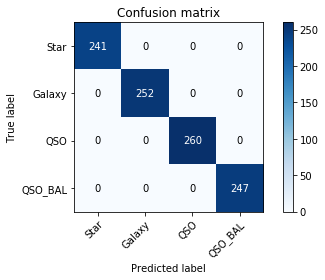

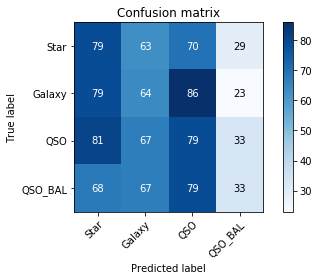

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

class_names=['Star','Galaxy','QSO','QSO_BAL']

def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.subplots(121)
#y_test=y_test.detach().numpy()
#y_pred=y_pred.detach().numpy()
#print(y_pred)
plot_confusion_matrix(y_test, y_test, classes=class_names, title='Confusion matrix')
plt.savefig('cm_train.png')
#plt.subplots(122)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix')
plt.savefig('cm_test.png')
from sklearn.metrics import precision_recall_fscore_support
prf=precision_recall_fscore_support(y_test, pred, average=None)#,labels=['Star','Galaxy','QSO','QSO_BAL'])

print(prf)